In [6]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import os
from shapely.geometry import MultiPolygon
os.chdir('C:/Users/jtrum/Desktop/hydroatlas_africa')

In [15]:
# Create an empty dictionary to store the geodataframes
gdfs = {} #empty dictionary of gdfs

for level in range(1, 13): #for loop to load all shapefiles
    filename = f'hybas_af_lev{level:02d}_v1c.shp'  #:02d ensures two-digit format
    gdf = gpd.read_file(filename) #read the shapefile
    key = f'L{level:02d}' #add the geodataframe to the dictionary with the corresponding key
    gdfs[key] = gdf

In [7]:
# this script takes data from HydroBASINS at the continent level, and uploads the
# 12 different levels of basins. it also loads the geojson of the AOI and then dependent
# on which level of basin is selected, it will determine which basins are within the AOI
# and complete a union of those basins and save the catchment as a new geojson file.

# load the AOI
aoi = gpd.read_file('luan.geojson')

# write a for loop to load all the basin levels and name them L1 - L12
for i in range(1,13):
    globals()['L{}'.format(i)] = gpd.read_file('hybas_af_lev0{}_v1c.shp'.format(i))
    

# to load in one level of basin, uncomment the level you want to load
# L1 = gpd.read_file('hybas_af_lev01_v1c.shp')
# L2 = gpd.read_file('hybas_af_lev02_v1c.shp')
# L3 = gpd.read_file('hybas_af_lev03_v1c.shp')
# L4 = gpd.read_file('hybas_af_lev04_v1c.shp')
# L5 = gpd.read_file('hybas_af_lev05_v1c.shp')
L6 = gpd.read_file('hybas_af_lev06_v1c.shp')
# L7 = gpd.read_file('hybas_af_lev07_v1c.shp')
# L8 = gpd.read_file('hybas_af_lev08_v1c.shp')
# L9 = gpd.read_file('hybas_af_lev09_v1c.shp')
# L10 = gpd.read_file('hybas_af_lev10_v1c.shp')
# L11 = gpd.read_file('hybas_af_lev11_v1c.shp')
# L12 = gpd.read_file('hybas_af_lev12_v1c.shp')

# create a function to determine which basins are within the AOI
def basin_in_aoi(basin, aoi):
    basin['in_aoi'] = basin.geometry.within(aoi.geometry.iloc[0])  # Check if basins are within the AOI geometry

    basins_within_aoi = basin[basin['in_aoi'] == 1]  # Create a new DataFrame with only the basins within the AOI
    if len(basins_within_aoi) > 0:
        catchment = basins_within_aoi.unary_union  # Make a union of the basins within AOI
        catchment = MultiPolygon([catchment])  # Wrap it in a MultiPolygon in case it's a single geometry
        catchment.to_file('catchment.geojson')  # Save as a new GeoJSON file
        return catchment
    else:
        return None  # No basins within AOI

catchment = basin_in_aoi(L6, aoi)
if catchment:
    gpd.GeoSeries([catchment]).plot()  # Plot the catchment if it exists




In [11]:
type(catchment)

NoneType

<Axes: >

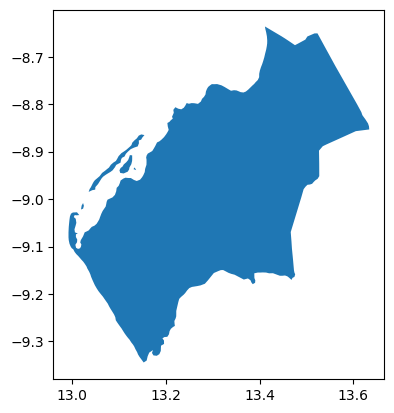

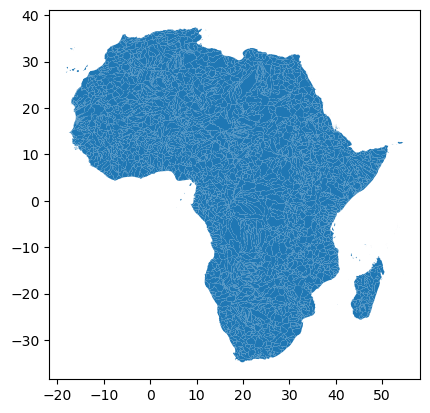

In [13]:
aoi.plot()
L6.plot()

In [ ]:
# create a function to determine which basins are within the AOI
def basin_in_aoi(basin, aoi):
    basin['in_aoi'] = 0
    for i in range(len(aoi)):
        if basin.geometry.within(aoi.loc[i, 'geometry']): # if the basin is within the AOI, set the in_aoi column to 1
            basin.loc[:, 'in_aoi'] = 1
        basin = basin[basin['in_aoi'] == 1]  # create a new dataframe with only the basins within the AOI, and make a union of them to return one catchment
        basin = basin.unary_union
        basin.to_file('catchment.geojson')         # save as a new geojson file
    return basin

catchment = basin_in_aoi(L6, aoi)
catchment.plot()

In [5]:
#set working directory


#read in shapefiles of different levels
# L1 = gpd.read_file('hybas_af_lev01_v1c.shp')
# L2 = gpd.read_file('hybas_af_lev02_v1c.shp')
# L3 = gpd.read_file('hybas_af_lev03_v1c.shp')
L4 = gpd.read_file('hybas_af_lev04_v1c.shp')
L5 = gpd.read_file('hybas_af_lev05_v1c.shp')
L6 = gpd.read_file('hybas_af_lev06_v1c.shp')
L7 = gpd.read_file('hybas_af_lev07_v1c.shp')
L8 = gpd.read_file('hybas_af_lev08_v1c.shp')
L9 = gpd.read_file('hybas_af_lev09_v1c.shp')
L10 = gpd.read_file('hybas_af_lev10_v1c.shp')
L11 = gpd.read_file('hybas_af_lev11_v1c.shp')
L12 = gpd.read_file('hybas_af_lev12_v1c.shp')

<Axes: >

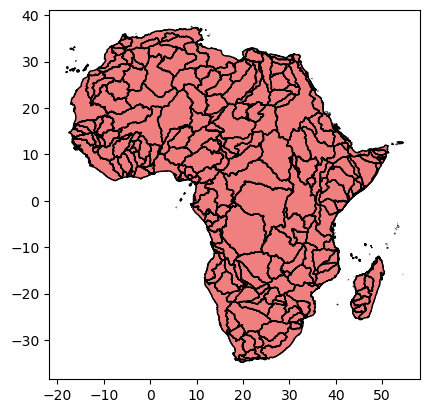

In [7]:
L4.plot(color='#f08080ff', edgecolor='black')

In [9]:
#load in luanda geojson
luanda = gpd.read_file('luan.geojson')

<Axes: >

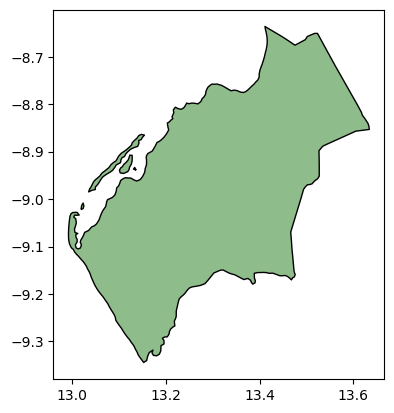

In [10]:
luanda.plot(color='#8FBC8BFF', edgecolor='black')

<Axes: >

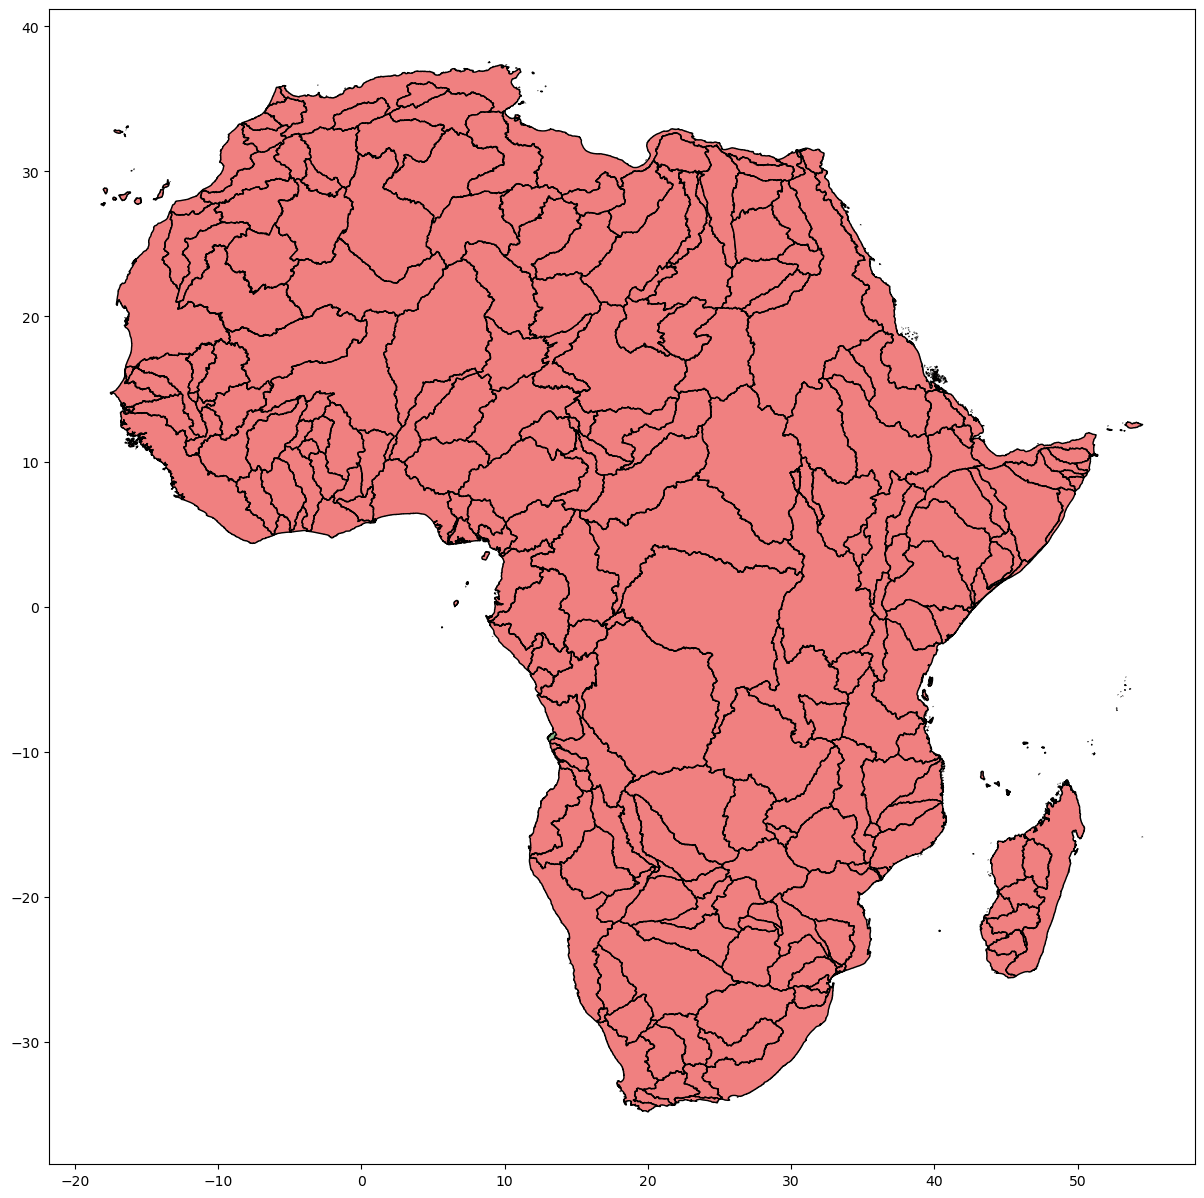

In [11]:
#plot L4 and Luanda together
fig, ax = plt.subplots(figsize=(15, 15))
L4.plot(ax=ax, color='#f08080ff', edgecolor='black')
luanda.plot(ax=ax, color='#8FBC8BFF', edgecolor='black')

In [13]:
#see which rows in L4 intersect with Luanda
L4['intersects'] = L4.intersects(luanda.loc[0, 'geometry'])
#which rows intersect?
intersection = L4.loc[L4['intersects'] == True]
intersection

,HYBAS_ID,NEXT_DOWN,NEXT_SINK,MAIN_BAS,DIST_SINK,DIST_MAIN,SUB_AREA,UP_AREA,PFAF_ID,ENDO,COAST,ORDER,SORT,geometry,intersects
74,1040019280,0,1040019280,1040019280,0.0,0.0,3212.6,3212.6,1317,0,1,0,75,"POLYGON ((13.20000 -9.54167, 13.19673 -9.54090...",True
75,1040019420,0,1040019420,1040019420,0.0,0.0,150084.9,150086.5,1318,0,0,1,76,"POLYGON ((17.13333 -13.57917, 17.13277 -13.576...",True
76,1040019430,0,1040019430,1040019430,0.0,0.0,76150.4,76150.4,1319,0,1,0,77,"MULTIPOLYGON (((13.11250 -8.95000, 13.11492 -8...",True


In [19]:
len(L5)

1028

<Axes: >

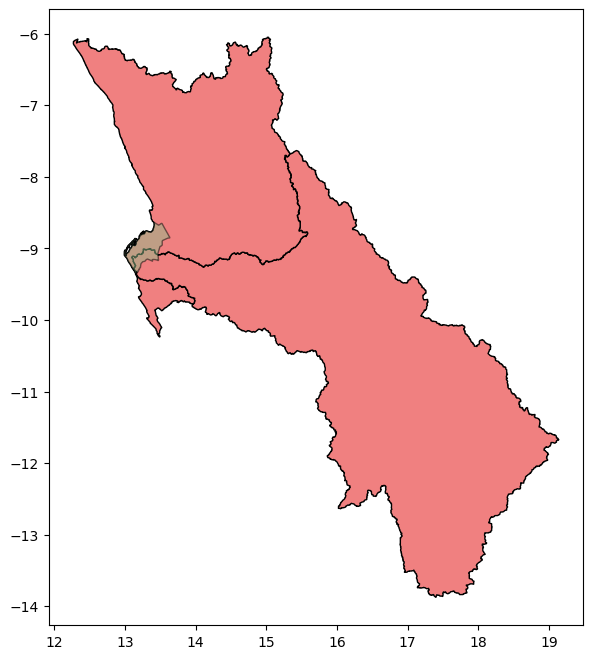

In [16]:
fig, ax = plt.subplots(figsize=(8, 8))
intersection.plot(ax=ax, color='#f08080ff', edgecolor='black')
luanda.plot(ax=ax, color='#8FBC8BFF', edgecolor='black', alpha=0.5)

In [17]:
#see which rows in L4 intersect with Luanda
L5['intersects'] = L5.intersects(luanda.loc[0, 'geometry'])
#which rows intersect?
intersection5 = L5.loc[L5['intersects'] == True]
intersection5

,HYBAS_ID,NEXT_DOWN,NEXT_SINK,MAIN_BAS,DIST_SINK,DIST_MAIN,SUB_AREA,UP_AREA,PFAF_ID,ENDO,COAST,ORDER,SORT,geometry,intersects
274,1050019280,0,1050019280,1050019280,0.0,0.0,3212.6,3212.6,13170,0,1,0,275,"POLYGON ((13.20000 -9.54167, 13.19673 -9.54090...",True
275,1050019420,0,1050019420,1050019420,0.0,0.0,6494.9,150086.5,13181,0,0,1,276,"POLYGON ((14.24167 -9.22083, 14.24255 -9.21738...",True
284,1050019430,0,1050019430,1050019430,0.0,0.0,76150.4,76150.4,13190,0,1,0,285,"MULTIPOLYGON (((13.12083 -8.90417, 13.13257 -8...",True


<Axes: >

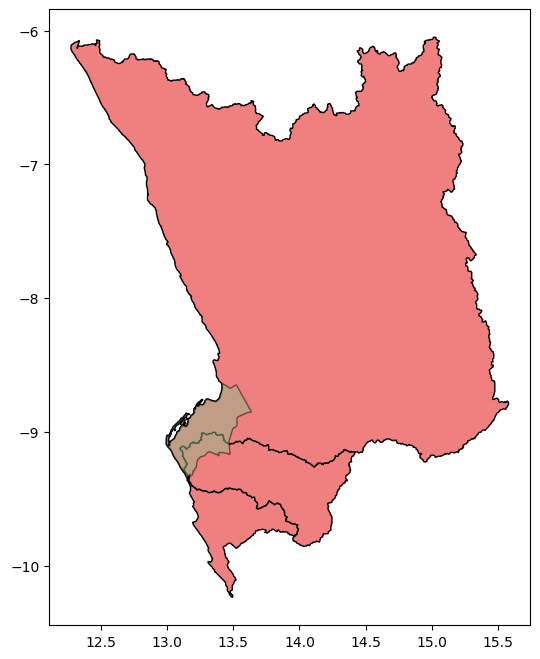

In [20]:
fig, ax = plt.subplots(figsize=(8, 8))
intersection5.plot(ax=ax, color='#f08080ff', edgecolor='black')
luanda.plot(ax=ax, color='#8FBC8BFF', edgecolor='black', alpha=0.5)

<Axes: >

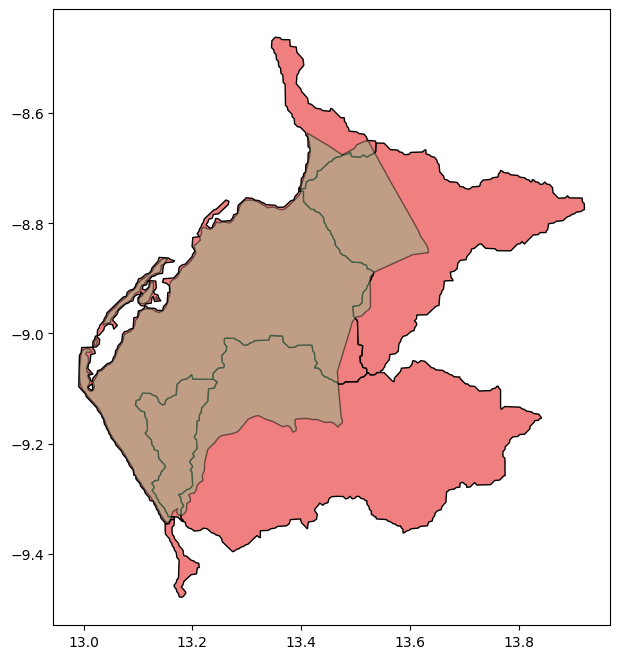

In [21]:
#see which rows in L4 intersect with Luanda
L8['intersects'] = L8.intersects(luanda.loc[0, 'geometry'])
#which rows intersect?
intersection8 = L8.loc[L8['intersects'] == True]
intersection8

fig, ax = plt.subplots(figsize=(8, 8))
intersection8.plot(ax=ax, color='#f08080ff', edgecolor='black')
luanda.plot(ax=ax, color='#8FBC8BFF', edgecolor='black', alpha=0.5)